In [138]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [139]:
# Loading data

data = pd.read_csv(r"C:\Users\Manoj\Downloads\wine-reviews.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [79]:
# Basic data info

data.info()

# Describe data

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [80]:
data.duplicated().sum()

desi_fill = data['designation'].unique()

In [140]:

# To find the most frequent item
data['variety'].mode()

data.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [142]:
# Filling null values with appropriate values

data['designation'].replace(np.nan, 'Reserve', inplace = True)                  # mode of designation is 'Reserve'
data['price'].fillna(data['price'].mean(), inplace = True)                      # mean val is filling
data['country'].replace(np.nan, 'US', inplace = True)                           # mode of country is 'US'
data['province'].replace(np.nan, 'California', inplace = True)                  # mode is 'California'
data['region_1'].replace(np.nan, 'Napa Valley', inplace = True)                 # mode is 'Napa Valley'
data['region_2'].replace(np.nan, 'Central Coast', inplace = True)               # mode is 'Central Coast'
data['taster_name'].replace(np.nan, 'Roger Voss', inplace = True)               # mode is 'Roger Voss'
data['taster_twitter_handle'].replace(np.nan, '@vossroger', inplace = True)     # mode is '@vossroger'
data['variety'].replace(np.nan, 'Pinot Noir', inplace = True)                   # mode is 'Pinot Noir'


In [143]:
data.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

C:\Users\Manoj\AppData\Local\Temp\ipykernel_7264\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

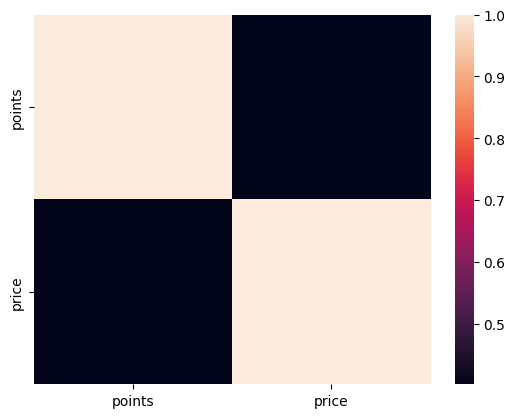

In [144]:
sns.heatmap(data.corr())

In [117]:
name = data[data['price'] == 3300]  # price max is 3300 and price min is 4
name

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,Reserve,88,3300.0,Bordeaux,Médoc,Central Coast,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


In [136]:
min_points = data['points'].min()
max_points = data['points'].max()

max_points, min_points

(100, 80)

In [145]:
name = data[data['price'] == 4]

In [147]:
name['country'].unique()

array(['Spain', 'US', 'Argentina', 'Romania'], dtype=object)